##SOFTWARE ANALYTICS (BNM864J) FINAL ASSIGNMENT 
##CANDIDATE NUMBER : 644090

Datasets
You can choose one of three datasets for analysis:
(1) Loan applications:  loanapp.csv  . The dataset contains data on loan applications to a bank, including various types of information on the applicant and the purpose of the loan, along with the eventual loan decision (approve or reject - see the column loan_decision). A detailed description of the columns can be found here   here .
(2) Major League Baseball:  mlb.csv  . Data on salaries and other information (such as race, position and performance information) on baseball players in MLB in 1993.  A detailed description of the columns can be found   here .
(3) Wages:  wage.csv . Data on employees, such as their hourly wage, gender, race, marital status, etc.  A  detailed description of the columns can be found  here .
The source for all the three datasets is a  companion page for Woolridge J. (2013). Introductory Econometrics: A Modern Approach.
Format of submission
You are free to choose a programming language to use for the assignment- either Python or R. You can also use Excel, however, do note that many types of the expected analysis are not directly available in Excel and you will need to do quite a lot of manual manipulation of the data if you do use Excel. You can prepare your project in the form of a Jupyter notebook (Python), RMarkdown notebook (R) or an Excel file.   With any of the three options, the final submission should be converted to a PDF file (when using Excel you may consider inserting relevant tables and plots into a MS Word document and before converting it to PDF). 
Steps of the EDA
The EDA project will need to include as many as possible of, but not limited to, the following steps:
1. Load a dataset from a CSV file
2. Display descriptive statistics about the dataset
3. Build a graph visualizing (some of) the numerical variables of the dataset
4. Check if any records in the data have any missing values; handle the missing data as appropriate (interpolate missing values, delete records with missing values, etc).
5. Display the distribution of (some of) numerical variables as histograms. Provide verbal comments on the graph.
6. Display unique values of a categorical variable.
7. Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between the variables. Provide verbal comments on the output.
8. Retrieve a subset of the data based on two or more criteria and present descriptive statistics on the subset. Provide verbal comments on the output.
9. Conduct a statistical test of the significance of the difference between the means of two subsets of the data. Provide verbal comments.
10. Create pivot tables, i.e., create a table that groups the data by a certain categorical variable and displays summaries for each categorical variable. Provide verbal comments.
11. Implement a linear regression model and interpret its output.
Each step of the analysis should be documented with comments, describing what the step is meant to achieve, and interpreting the result of the step. If the result of the step is a graph, interpret the graph in the comments below the graph. 
Before you start to work on this assignment, please familiarise yourself with the detailed evaluation criteria for this assignment by studying the assessment brief (see above).

Here I have chosen Major League Baseball data set and analysed the salary of the playes for the number of years they played and number of games they played.

All the required Libraries are are imported of the data analysis and for the visualization. 

In [1]:
import math
import statistics
import numpy as np
import scipy as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import scipy.integrate
from scipy.stats import ttest_ind

The first step is to load the data set from the csv file.

In [2]:
df = pd.read_csv(r"C:\Users\Lathapriya\Documents\BNM864J-Software Analytics\mlb.csv")
df.head(5)

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.8778
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.8778
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.8778
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.8778
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.8778


Here we can see the last five rows of the data set. 

In [3]:
df.tail()

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
347,312000,shortstop,white,35586456,5,439,1098,150,260,41,...,6,83,237,136,138,43,964,73.14964,13.87162,12.97875
348,275000,catcher,hispanic,35586456,2,211,700,63,183,32,...,11,64,261,29,115,0,983,73.14964,13.87162,12.97875
349,250000,thirdbase,white,35586456,3,249,828,112,176,36,...,41,110,213,94,264,10,941,73.14964,13.87162,12.97875
350,200000,secondbase,white,35586456,6,667,2087,217,510,92,...,13,168,244,137,239,20,987,73.14964,13.87162,12.97875
351,109000,outfield,white,35586456,1,12,24,1,4,0,...,0,2,167,0,3,0,857,73.14964,13.87162,12.97875


In [48]:
print(df.columns)

Index(['salary', 'player_position', 'race', 'team_payroll', 'years_played',
       'games_played', 'career_at_bats', 'career_runs', 'career_hits',
       'career_doubles', 'career_triples', 'career_homeruns',
       'career_runs_batted_in', 'career_batting_average', 'career_walks',
       'career_strike_outs', 'career_stolen_bases', 'career_fielding_percent',
       'white_percent_in_city', 'black_percent_in_city',
       'hispanic_percent_in_city'],
      dtype='object')


The shape of the data set can be viewed which includes the label column.

In [4]:
df.shape

(352, 21)

The data is described and we can see the unavilable value in the data set.

In [5]:
df.describe(include="all")

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,3.520000e+02,352,352,3.520000e+02,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,329.000000,329.000000,329.000000
unique,NaN,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,outfield,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,136,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.331514e+06,NaN,NaN,3.077320e+07,6.309659,645.423295,2155.704545,288.170455,580.889205,103.267045,...,54.531250,263.122159,258.900568,210.926136,338.681818,65.096591,976.474432,72.638240,16.541950,10.819810
std,1.383952e+06,NaN,NaN,8.725344e+06,3.873810,536.499990,2013.393716,298.500277,571.632472,103.831374,...,73.369759,281.741692,38.443636,227.191851,323.886980,112.548093,19.751430,15.249897,13.688558,9.402261
min,1.090000e+05,NaN,NaN,8.854000e+06,1.000000,7.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,111.000000,0.000000,0.000000,0.000000,800.000000,20.296300,3.741786,0.540870
25%,2.527000e+05,NaN,NaN,2.455733e+07,3.000000,230.000000,631.500000,73.000000,163.000000,26.000000,...,8.000000,59.750000,245.000000,49.750000,101.000000,4.750000,969.000000,67.668960,8.007545,1.962080
50%,6.750000e+05,NaN,NaN,3.413650e+07,6.000000,518.500000,1583.000000,190.500000,416.000000,70.000000,...,26.000000,172.000000,259.000000,137.000000,235.500000,24.500000,980.500000,74.619650,14.453980,10.877800
75%,2.250000e+06,NaN,NaN,3.779200e+07,9.000000,930.000000,3026.000000,405.500000,817.250000,146.250000,...,70.000000,358.000000,275.000000,304.250000,474.000000,75.000000,988.000000,82.948860,18.755630,16.330650


For the missing values in the data we are dropping or removing them from data set and getting clean data set.

In [6]:
df1=df.dropna(axis=0)
df1

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.87780
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.87780
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.87780
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.87780
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.87780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,312000,shortstop,white,35586456,5,439,1098,150,260,41,...,6,83,237,136,138,43,964,73.14964,13.87162,12.97875
348,275000,catcher,hispanic,35586456,2,211,700,63,183,32,...,11,64,261,29,115,0,983,73.14964,13.87162,12.97875
349,250000,thirdbase,white,35586456,3,249,828,112,176,36,...,41,110,213,94,264,10,941,73.14964,13.87162,12.97875
350,200000,secondbase,white,35586456,6,667,2087,217,510,92,...,13,168,244,137,239,20,987,73.14964,13.87162,12.97875


Here we can see the colounms in the data set. 

In [7]:
df1.columns

Index(['salary', 'player_position', 'race', 'team_payroll', 'years_played',
       'games_played', 'career_at_bats', 'career_runs', 'career_hits',
       'career_doubles', 'career_triples', 'career_homeruns',
       'career_runs_batted_in', 'career_batting_average', 'career_walks',
       'career_strike_outs', 'career_stolen_bases', 'career_fielding_percent',
       'white_percent_in_city', 'black_percent_in_city',
       'hispanic_percent_in_city'],
      dtype='object')

To find the number of unique value under each coloumn of the data set.

In [8]:
df1.nunique()

salary                      202
player_position               6
race                          3
team_payroll                 26
years_played                 19
games_played                297
career_at_bats              322
career_runs                 254
career_hits                 290
career_doubles              186
career_triples               63
career_homeruns             135
career_runs_batted_in       253
career_batting_average      107
career_walks                231
career_strike_outs          259
career_stolen_bases         125
career_fielding_percent      61
white_percent_in_city        22
black_percent_in_city        22
hispanic_percent_in_city     22
dtype: int64

Now we are obtaing each unique value of categorical data "player_position" and "race".

In [9]:
df1['player_position'].unique()

array(['shortstop', 'firstbase', 'thirdbase', 'outfield', 'catcher',
       'secondbase'], dtype=object)

In [10]:
df1['race'].unique()

array(['black', 'white', 'hispanic'], dtype=object)

Again checking for any missing value.

In [11]:
df1.isnull().sum()

salary                      0
player_position             0
race                        0
team_payroll                0
years_played                0
games_played                0
career_at_bats              0
career_runs                 0
career_hits                 0
career_doubles              0
career_triples              0
career_homeruns             0
career_runs_batted_in       0
career_batting_average      0
career_walks                0
career_strike_outs          0
career_stolen_bases         0
career_fielding_percent     0
white_percent_in_city       0
black_percent_in_city       0
hispanic_percent_in_city    0
dtype: int64

Removing all the coloumns that are not required for the analysis.

In [12]:
df1 = df.drop(['white_percent_in_city','black_percent_in_city','hispanic_percent_in_city','career_doubles','career_at_bats','career_runs','career_hits','career_triples','career_homeruns','career_runs_batted_in','career_batting_average','career_walks','career_strike_outs','career_stolen_bases','career_fielding_percent'], axis=1)

In [13]:
df1.head()

,salary,player_position,race,team_payroll,years_played,games_played
0,3375000,shortstop,black,38407380,8,918
1,3100000,firstbase,white,38407380,5,751
2,2900000,thirdbase,white,38407380,8,1056
3,1650000,outfield,black,38407380,12,1196
4,700000,outfield,black,38407380,17,2032


Grouping by the categorical data 'race' and ploting them with salary by years_playes and marking them with the scatterplot.

<AxesSubplot:xlabel='salary', ylabel='years_played'>

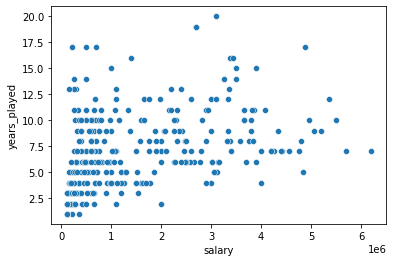

In [14]:
df1.groupby('race').sum()
sns.scatterplot(data=df1, x="salary", y="years_played")

For the grouped categorical data and histogram is diplayed.

<AxesSubplot:>

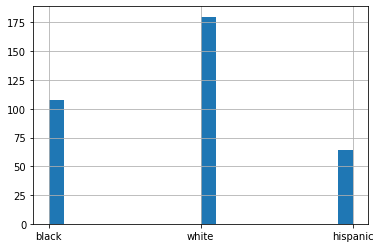

In [15]:
df1['race'].hist(bins=20)

The Graphical Vizualization of players_position in the pie chart is shown.

<AxesSubplot:ylabel='player_position'>

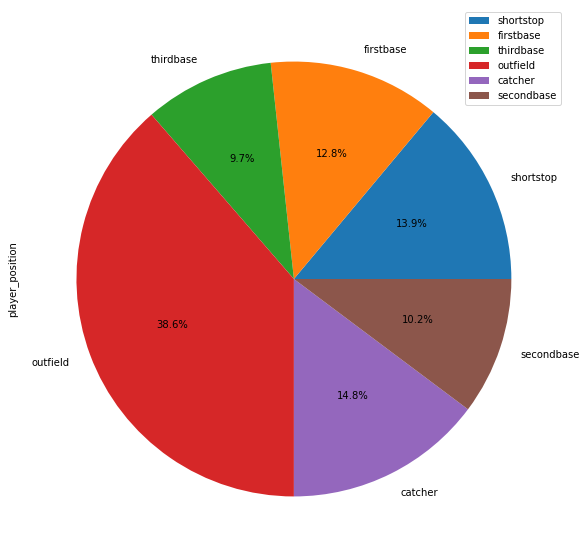

In [16]:
type_counts = df1['player_position'].value_counts()
vis = pd.DataFrame({'player_position': type_counts}, 
                     index = ['shortstop', 'firstbase', 'thirdbase', 'outfield', 'catcher','secondbase'])
vis.plot.pie(y='player_position', figsize=(10,10), autopct='%1.1f%%')

The graphical vizualization of no of players for years players played is represented in bar chart.

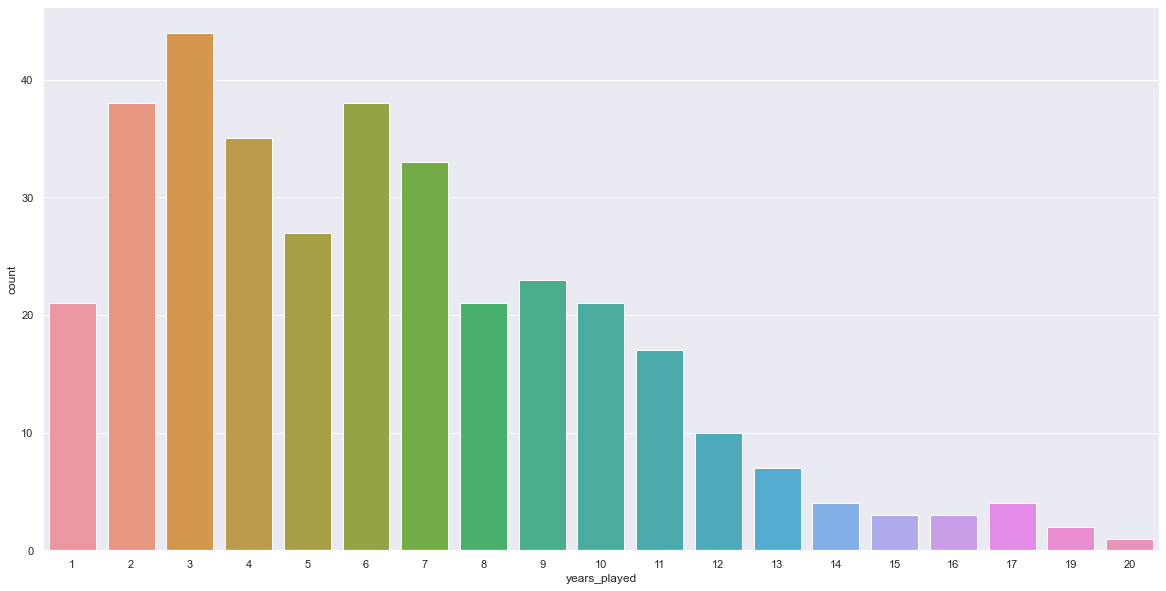

In [17]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='years_played', data=df1)

The information on the data set are obtaine from data set.

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   salary           352 non-null    int64 
 1   player_position  352 non-null    object
 2   race             352 non-null    object
 3   team_payroll     352 non-null    int64 
 4   years_played     352 non-null    int64 
 5   games_played     352 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 16.6+ KB


Contingency table is build between two potentially related categorical variable 'race' and 'player_position'.

In [19]:
cont_table = pd.crosstab(df1['race'], df1['player_position'])
cont_table

player_position,catcher,firstbase,outfield,secondbase,shortstop,thirdbase
race,,,,,,
black,2,10,72,8,7,9
hispanic,7,9,19,7,19,3
white,43,26,45,21,23,22


The line graph is plotted for the contingency table.

<AxesSubplot:xlabel='race'>

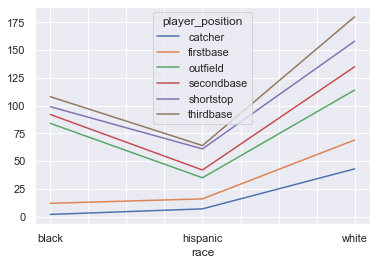

In [20]:
cont_table.plot(kind="line", stacked=True, rot=0)

Index is obtained with the range between the data.

In [21]:
df1.index

RangeIndex(start=0, stop=352, step=1)

In [22]:
# to check the values 
df1.values

array([[3375000, 'shortstop', 'black', 38407380, 8, 918],
       [3100000, 'firstbase', 'white', 38407380, 5, 751],
       [2900000, 'thirdbase', 'white', 38407380, 8, 1056],
       ...,
       [250000, 'thirdbase', 'white', 35586456, 3, 249],
       [200000, 'secondbase', 'white', 35586456, 6, 667],
       [109000, 'outfield', 'white', 35586456, 1, 12]], dtype=object)

To find the correlation between the number of years the players played to the the salary. Here we are using the pearson method which shows us with increase in the nuber of years played the salary also varies at fourty seven percentage.

In [23]:
df1['years_played'].corr(df1['salary'],method='pearson')

0.4733485584593332

Pivot table is create for the 'race' categorical variable for the value of 'salary' which is summarised for the entire group.

In [24]:
table = pd.pivot_table(df1,index=['race'],values=['salary'], aggfunc=np.mean)
table

,salary
race,
black,1.654350e+06
hispanic,1.050723e+06
white,1.237650e+06


For the summarised pivot table bar graph is plotted.

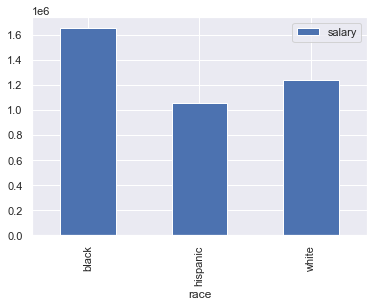

In [25]:
table.plot(kind='bar');

Similary pivot table is build for the 'players_position' categorical variable with value of salary and bar graph is plotted from which we can understand firstbase position player obtains more salary that any other position.

In [26]:
table = pd.pivot_table(df1,index=['player_position'],values=['salary'], aggfunc=np.mean)
table

,salary
player_position,
catcher,8.925192e+05
firstbase,1.586781e+06
outfield,1.539324e+06
secondbase,1.170208e+06
shortstop,1.069211e+06
thirdbase,1.382647e+06


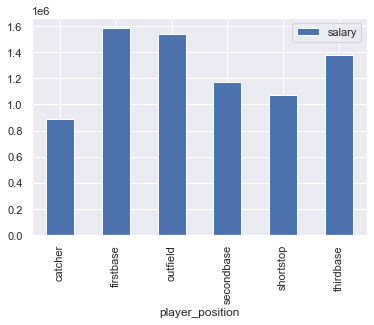

In [27]:
table.plot(kind='bar');

The descriptive statistics of the data set. 

In [28]:
df1 [['salary','years_played','games_played']]

,salary,years_played,games_played
0,3375000,8,918
1,3100000,5,751
2,2900000,8,1056
3,1650000,12,1196
4,700000,17,2032
...,...,...,...
347,312000,5,439
348,275000,2,211
349,250000,3,249
350,200000,6,667


In [29]:
average = df1['salary'].mean()
print(average)
med= df1['salary'].median()
print(med)
standard_deviation=df1['salary'].std()
print(standard_deviation)

1331514.4630681819
675000.0
1383952.3400626658


In [30]:
average2 = df1['years_played'].mean()
print(average2)
med2 = df1['years_played'].median()
print(med2)
standard_deviation2=df1['years_played'].std()
print(standard_deviation2)

6.309659090909091
6.0
3.8738097736791564


In [31]:
average3 = df1['games_played'].mean()
print(average3)
med3= df1['games_played'].median()
print(med3)
standard_deviation3=df1['games_played'].std()
print(standard_deviation3)

645.4232954545455
518.5
536.4999898545152


In [32]:
people= df1[df1['race'] == 'black']['salary']
people.mean()

1654350.462962963

In [33]:
people2= df1[df1['race'] == 'white']['salary']
people2.mean()

1237649.8555555556

In [34]:
people3= df1[df1['race'] == 'hispanic']['salary']
people3.mean()

1050722.921875

The independent sample test is done with categorical variable race from which shows us that the p-value is less than the significance value.

In [35]:
#independent sample test
t_val, p_val = stats.ttest_ind(people, people2)
print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 2.439220849805341, p-value: 0.015326987986046892


In [36]:
t_val, p_val = stats.ttest_ind(people, people3)
print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 2.5754827267821643, p-value: 0.010860957887189545


The paired sample test is done between the variable salary and years_played which shows us the p-value is less than the significance level where the null hypothesis can be rejected. 

In [37]:
#paired Sample test
t_val, p_val = stats.ttest_rel(df1["salary"],df1["years_played"])
print(f"t-value:{t_val},p-value:{p_val}")

t-value:18.050723051674108,p-value:5.480156131731112e-52


The chi square test is done between two categorical variable from the contingency table which the p-value is less than significance value where the null hypothesis can be rejected as there is no dependency between the race and the players position.

In [38]:
#chi squared test
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print(f"p-value: {p_val}")

p-value: 2.2934333235364454e-12


The scatterplot is graphed on years_played to the salary

<AxesSubplot:xlabel='years_played', ylabel='salary'>

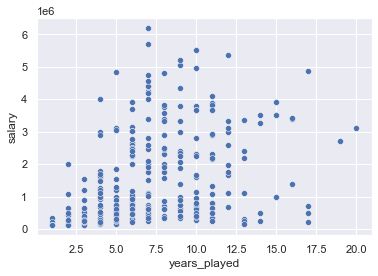

In [39]:
sns.scatterplot(data=df1, x="years_played", y="salary")

The correlation is done between the years_played and the salary which done in both the method pearson and spearman which show there is positive increase in the salary to the number of years played.

In [40]:
df1['years_played'].corr(df['salary'], method='pearson')

0.4733485584593332

In [41]:
df1['years_played'].corr(df['salary'], method='spearman')

0.656070589697055

Linear regression model is done for the years_played and the salary

In [42]:
#Estimate the model
model=sm.OLS.from_formula('years_played~salary',data=df1).fit()

In [43]:
intercept,slope = model.params
print(intercept)
print(slope)

4.545474180036147
1.3249461119691991e-06


In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           years_played   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     101.1
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           4.68e-21
Time:                        20:42:00   Log-Likelihood:                -931.01
No. Observations:                 352   AIC:                             1866.
Df Residuals:                     350   BIC:                             1874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5455      0.253     17.972      0.000       4.048       5.043
salary      1.325e-06   1.32e-07     10.053      0.000    1.07e-06    1.58e-06
==============================================================================
Omnibus:                       64.342   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.963
Skew:                           1.150   Prob(JB):                     8.81e-22
Kurtosis:                       4.148   Cond. No.                     2.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above model summary of simple linear regression we can get estimated intercept and the coefficients of the salary and the intercept and coefficientof the t-test is less than significance level we can conclude that they have effect on the dependent variable.

In [45]:
#multiple linear regression model
model = sm.OLS.from_formula('salary~years_played + games_played + race', data=df1).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     57.98
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           1.91e-37
Time:                        20:42:00   Log-Likelihood:                -5386.3
No. Observations:                 352   AIC:                         1.078e+04
Df Residuals:                     347   BIC:                         1.080e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.007e+06   1.53e+05      6.564      0.000    7.05e+05    1.31e+06
race[T.hispanic] -2.962e+05   1.71e+05     -1.728      0.085   -6.33e+05     4.1e+04
race[T.white]    -2.385e+05   1.32e+05     -1.810      0.071   -4.98e+05    2.06e+04
years_played     -2.371e+05    4.4e+04     -5.385      0.000   -3.24e+05    -1.5e+05
games_played      3092.6878    318.213      9.719      0.000    2466.820    3718.556
==============================================================================
Omnibus:                       40.457   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.548
Skew:                           0.817   Prob(JB):                     2.36e-12
Kurtosis:                       3.989   Cond. No.                     3.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above model summary of multiple linear regression the R and R squared value are increased than the simple linear regression. we can get estimated intercept and the coefficients of the variables and the  intercept and coefficientof the t-test of years_played and games_played are affting positively and the race(hispanic), race(white) are affecting negatively is less than significance level we can conclude that they have effect on the dependent variable.therefore from this model we cannot reject the null hypothesis.